In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import datetime as dt
import math
import seaborn as sns

In [2]:
df_type = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/03.eICU_SAKI_trajCluster/df_mixAK_fea4_C3_eicu.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("纳入患者数量：",len(all_lst))

df_type_filt["groupHPD"].value_counts()

纳入患者数量： 1417


2    869
1    423
3    125
Name: groupHPD, dtype: int64

DR    time  wbc
0  -1.0  403
1   1.0  365
2   2.0  342
3   3.0  295
4   4.0  259
5   5.0  218
6   6.0  182
7   7.0  149
RR    time  wbc
0  -1.0  820
1   1.0  748
2   2.0  669
3   3.0  555
4   4.0  444
5   5.0  347
6   6.0  292
7   7.0  225
PW    time  wbc
0  -1.0  122
1   1.0  113
2   2.0   97
3   3.0   86
4   4.0   68
5   5.0   62
6   6.0   51
7   7.0   48


<ipython-input-5-46ed298948b8>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[0])
<ipython-input-5-46ed298948b8>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[1])
<ipython-input-5-46ed298948b8>:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[2])


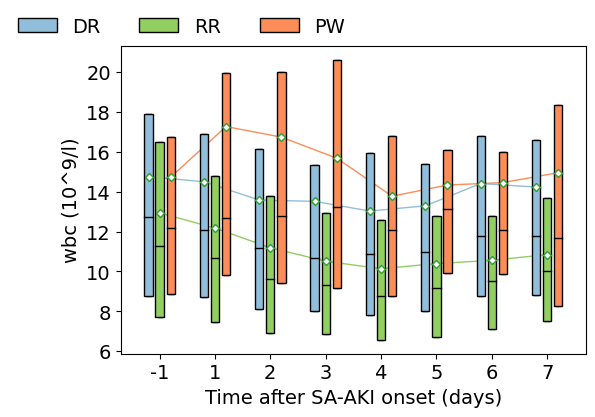

DR    time  neutrophils
0  -1.0          342
1   1.0          308
2   2.0          291
3   3.0          252
4   4.0          220
5   5.0          182
6   6.0          151
7   7.0          127
RR    time  neutrophils
0  -1.0          680
1   1.0          620
2   2.0          555
3   3.0          461
4   4.0          360
5   5.0          284
6   6.0          236
7   7.0          185
PW    time  neutrophils
0  -1.0          108
1   1.0           98
2   2.0           82
3   3.0           75
4   4.0           60
5   5.0           55
6   6.0           45
7   7.0           43


<ipython-input-5-46ed298948b8>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[0])
<ipython-input-5-46ed298948b8>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[1])
<ipython-input-5-46ed298948b8>:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[2])


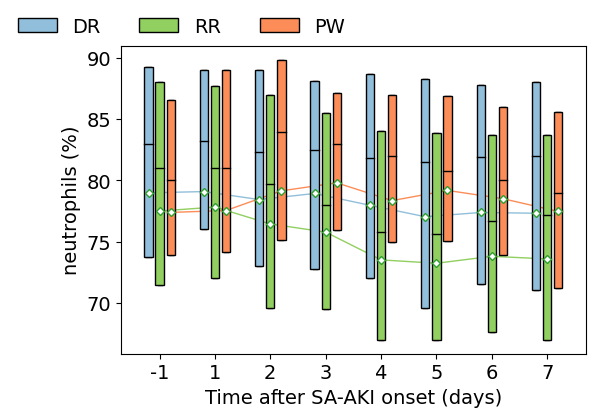

DR    time  crp
0  -1.0   28
1   1.0   26
2   2.0   25
3   3.0   23
4   4.0   19
5   5.0   18
6   6.0   17
7   7.0   12
RR    time  crp
0  -1.0   66
1   1.0   62
2   2.0   57
3   3.0   50
4   4.0   39
5   5.0   34
6   6.0   28
7   7.0   24
PW    time  crp
0  -1.0    8
1   1.0    8
2   2.0    7
3   3.0    7
4   4.0    8
5   5.0    7
6   6.0    6
7   7.0    5


<ipython-input-5-46ed298948b8>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[0])
<ipython-input-5-46ed298948b8>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[1])
<ipython-input-5-46ed298948b8>:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[2])


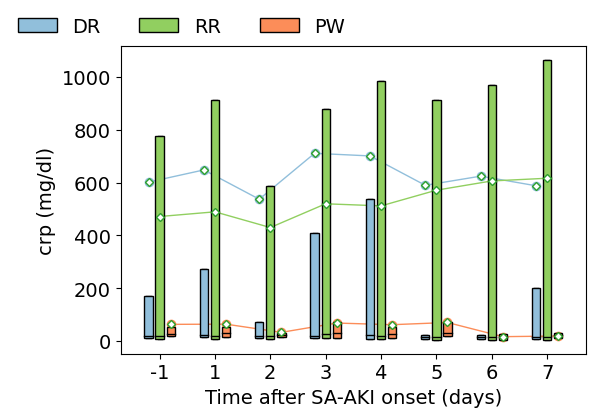

In [5]:
import matplotlib.pyplot as plt

fea_lst = ['wbc', 'neutrophils', 'crp']  
lab_dict = {'wbc':'wbc (10^9/l)','neutrophils': 'neutrophils (%)', 'crp':'crp (mg/dl)',"PCT":"PCT (µg/l)"}
min_dict = {'wbc':4, 'neutrophils':40, 'crp':0,"PCT":0}
max_dict = {'wbc':11, 'neutrophils':75, 'crp':10,"PCT":0.5}
give_bound = False
for fea in fea_lst:
    df_fea = pd.read_csv("df_infection_feature.csv")
    choose_time_lst = [-1,1,2,3,4,5,6,7] 
    df_fea =  df_fea[df_fea["time"].isin(choose_time_lst)] 
    df = pd.merge(df_type_filt,df_fea, how="inner",on="stay_id")
    df1 = df[df["groupHPD"]==1][[fea,"time"]]
    df2 = df[df["groupHPD"]==2][[fea,"time"]]
    df3 = df[df["groupHPD"]==3][[fea,"time"]]
    print("DR",df1.groupby("time").agg({fea:"count"}).reset_index())
    print("RR",df2.groupby("time").agg({fea:"count"}).reset_index())
    print("PW",df3.groupby("time").agg({fea:"count"}).reset_index())
    dataframes1 = [group[1] for group in df1.groupby('time')]
    dataframes2 = [group[1] for group in df2.groupby('time')]
    dataframes3 = [group[1] for group in df3.groupby('time')]

    fig = plt.figure(figsize=(6,4))
    choose_time_lst_x = range(-1,len(choose_time_lst)-1) 
    choose_time_lst1 = [i-0.2 for i in choose_time_lst_x]
    choose_time_lst2 = choose_time_lst_x
    choose_time_lst3 = [i+0.2 for i in choose_time_lst_x]
    medianprops = dict(linestyle='-', linewidth=1, color='black') #中位线设置
    meanprops = dict(color='b', markersize=4,marker="D",markerfacecolor="white")
    color_lst = ['#91bfdb','#91cf60','#fc8d59']
    boxprops1 = dict(color='black',facecolor=color_lst[0],edgecolor="black") #91bfdb
    boxprops2 = dict(color='black',facecolor=color_lst[1],edgecolor="black") #91cf60
    boxprops3 = dict(color='black',facecolor=color_lst[2],edgecolor="black") #fc8d59
    pa = plt.boxplot([df.dropna(subset=[fea])[fea] for df in dataframes1],whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.15,boxprops=boxprops1, positions=choose_time_lst1,patch_artist=True,meanprops=meanprops, medianprops=medianprops) # ,notch=True
    pb = plt.boxplot([df.dropna(subset=[fea])[fea] for df in dataframes2],whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.15,boxprops=boxprops2,positions=choose_time_lst2,patch_artist=True,meanprops=meanprops, medianprops=medianprops)
    pc = plt.boxplot([df.dropna(subset=[fea])[fea] for df in dataframes3],whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.15,boxprops=boxprops3,positions=choose_time_lst3,patch_artist=True,meanprops=meanprops, medianprops=medianprops)
    # 加添平均值的线图
    mean_points = [pa['means'][i].get_xydata()[0] for i in range(len(pa['means']))]
    plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[0])
    mean_points = [pb['means'][i].get_xydata()[0] for i in range(len(pb['means']))]
    plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[1])
    mean_points = [pc['means'][i].get_xydata()[0] for i in range(len(pc['means']))]
    plt.plot([p[0] for p in mean_points], [p[1] for p in mean_points], 'ro-', linewidth=1,color=color_lst[2])
    if give_bound == True:
        min_V = fea_min_dict[fea]
        max_V = fea_max_dict[fea]
        plt.hlines(y=[min_V,max_V], xmin=-1, xmax=6, color='#bdbdbd',linestyles="dashed")
        
    label_lst = ["C1", "C2", "C3"]
    plt.legend([pa["boxes"][0], pb["boxes"][0], pc["boxes"][0]], ["DR", "RR", "PW"] ,bbox_to_anchor=(0.52,1.15),ncol=3,frameon=False,fontsize=14)

    x_position= choose_time_lst_x
    x_position_fmt=choose_time_lst
    plt.xticks(x_position, x_position_fmt,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time after SA-AKI onset (days)',fontsize=14)
    plt.ylabel(lab_dict[fea],fontsize=14)
#     tit = "./result/MIMIC_" + fea + ".pdf"
#     plt.savefig(tit)
    plt.show()